# ANN MODEL FOR GAS CLASSIFICATION

# Import Required Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data File


In [ ]:
df = pd.read_csv("gas-drift_csv.csv")

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V120,V121,V122,V123,V124,V125,V126,V127,V128,Class
0,12285.6582,4.076635,4.842317,7.509393,10.822436,-1.312657,-1.853717,-6.924985,11800.9233,4.483500,...,-3.440387,1784.5324,1.907000,1.729200,4.881194,8.623828,-0.314110,-0.661556,-3.521663,4
1,-35.6889,0.993944,0.166099,0.489363,3.484663,-0.130298,-0.528364,-3.735347,266.4145,1.053988,...,-4.482534,904.9898,1.433707,1.068069,2.532958,5.369720,-0.183779,-0.534087,-4.635975,3
2,63927.2217,14.956941,19.971376,29.188512,33.291320,-10.433776,-16.062245,-49.490143,57405.8483,15.613843,...,-25.150090,14585.7879,8.189021,6.099452,12.127991,15.709651,-3.887082,-6.731473,-19.326895,4
3,2992.9019,1.380553,0.808910,1.288259,4.660135,-0.755903,-1.120470,-4.075213,4301.4033,1.652701,...,-7.215792,6044.5554,3.488295,2.662288,5.938297,8.544508,-1.567322,-2.701235,-6.472439,3
4,57524.7812,11.912566,14.631496,19.809240,23.715868,-9.084750,-11.770585,-39.234003,50051.0703,11.732548,...,-10.248794,10580.1006,5.752675,3.880740,8.545897,11.831716,-2.655521,-4.312744,-8.510591,4


In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V120,V121,V122,V123,V124,V125,V126,V127,V128,Class
count,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,...,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000
mean,50435.066174,6.638156,12.936688,18.743953,26.890695,-9.158655,-14.402383,-59.927598,57340.104585,6.648033,...,-19.136500,19688.565373,6.072066,7.138634,14.929364,19.090980,-4.901016,-8.167792,-16.089791,3.387994
std,69844.785952,13.486391,17.610061,24.899450,38.107685,12.729206,21.304606,131.017675,64045.265134,15.585780,...,26.516679,14281.652395,4.642192,5.248573,12.437311,14.391810,4.195360,7.637701,20.958479,1.728602
min,-16757.598600,0.088287,0.000100,0.000100,0.000100,-131.332873,-227.627758,-1664.735576,-16119.460900,0.185164,...,-482.278033,-8297.548800,0.712112,0.003238,0.011488,0.118849,-30.205911,-58.844076,-410.152297,1.000000
25%,6694.725950,2.284843,1.633350,2.386836,4.967988,-11.587169,-17.292559,-48.492764,13287.301875,2.776693,...,-22.363498,8837.838750,3.007381,3.059178,5.407551,8.039227,-6.789599,-11.162406,-18.938690,2.000000
50%,19364.439350,3.871227,4.977123,7.250892,11.680725,-3.338700,-4.956917,-14.040088,37764.263200,4.734586,...,-13.527887,16313.967300,4.973783,5.809107,11.325214,14.560676,-3.881763,-6.305962,-11.747499,3.000000
75%,63104.837125,8.400619,17.189166,26.411109,34.843226,-1.126897,-1.670327,-5.212213,70300.782575,8.608522,...,-7.358031,27009.592425,7.389566,10.222169,21.207572,26.547437,-1.804032,-2.874532,-6.429690,5.000000
max,670687.347700,1339.879283,167.079751,226.619457,993.605306,-0.006941,22.201589,115.273147,502202.812500,1672.363221,...,11.516418,96706.792700,45.574835,32.203601,297.225880,195.242555,-0.003817,6.851792,8.357968,6.000000


In [ ]:
df["Class"].unique()

array([4, 3, 6, 2, 1, 5], dtype=int64)

In [ ]:
# 1: Ethanol
# 2: Ethylene
# 3: Ammonia
# 4: Acetaldehyde
# 5: Acetone
# 6: Toluene

In [ ]:
drop_index = df[df["Class"] == 3].index

In [ ]:
DataFrame = df.drop(drop_index, axis = 0)

In [ ]:
DataFrame["Class"].unique()

array([4, 6, 2, 1, 5], dtype=int64)

In [ ]:
# 1: Ethanol
# 2: Ethylene
# 4: Acetaldehyde
# 5: Acetone
# 6: Toluene

In [ ]:
DataFrame.isnull().sum()   # no null elements present

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V125     0
V126     0
V127     0
V128     0
Class    0
Length: 129, dtype: int64

In [ ]:
DataFrame["Class"] = DataFrame["Class"].replace([1, 2, 4, 5, 6], ["Ethanol", "Ethylene", "Acetaldehyde", "Acetone", "Toluene"])

In [ ]:
DataFrame["Class"].unique()

array(['Acetaldehyde', 'Toluene', 'Ethylene', 'Ethanol', 'Acetone'],
      dtype=object)

In [ ]:
DataFrame.to_csv("final_df.csv")

## Count of data points for different Gases

Text(0, 0.5, 'Count')

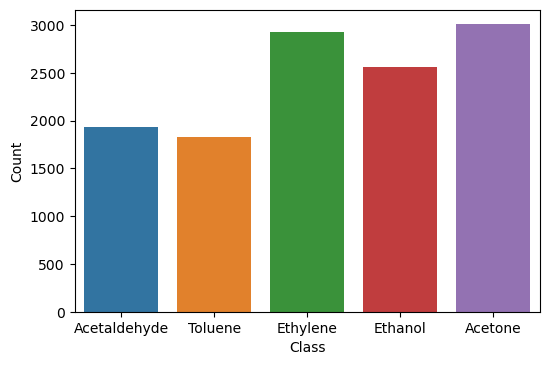

In [ ]:
plt.figure(dpi=100)
sns.countplot(data=DataFrame, x='Class')   # number of measurements for different gases
plt.ylabel("Count")

In [ ]:
DataFrame["Class"] = DataFrame["Class"].replace(["Ethanol", "Ethylene", "Acetaldehyde", "Acetone", "Toluene"], [1, 2, 3, 4, 5])

In [ ]:
DataFrame["Class"].unique()

array([3, 5, 2, 1, 4], dtype=int64)

In [ ]:
# 1: Ethanol
# 2: Ethylene
# 3: Acetaldehyde
# 4: Acetone
# 5: Toluene

In [ ]:
DataFrame.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V120,V121,V122,V123,V124,V125,V126,V127,V128,Class
0,12285.6582,4.076635,4.842317,7.509393,10.822436,-1.312657,-1.853717,-6.924985,11800.9233,4.483500,...,-3.440387,1784.5324,1.907000,1.729200,4.881194,8.623828,-0.314110,-0.661556,-3.521663,3
2,63927.2217,14.956941,19.971376,29.188512,33.291320,-10.433776,-16.062245,-49.490143,57405.8483,15.613843,...,-25.150090,14585.7879,8.189021,6.099452,12.127991,15.709651,-3.887082,-6.731473,-19.326895,3
4,57524.7812,11.912566,14.631496,19.809240,23.715868,-9.084750,-11.770585,-39.234003,50051.0703,11.732548,...,-10.248794,10580.1006,5.752675,3.880740,8.545897,11.831716,-2.655521,-4.312744,-8.510591,3
6,30529.5386,5.966777,7.500612,10.488028,14.834027,-4.763318,-6.363263,-16.922709,26663.9966,6.096648,...,-5.535606,4883.5491,2.716239,2.324221,6.069348,10.196280,-1.189983,-1.970012,-4.981643,3
8,45595.9986,7.756975,11.394358,15.422559,19.436047,-7.277227,-9.474040,-29.713690,38629.1192,7.888008,...,-9.201080,7847.8254,3.231610,3.529234,8.635498,12.566779,-2.055179,-3.354946,-8.126358,3


# Classification Models

## Support Vector Machines

In [ ]:
X = DataFrame.drop('Class', axis=1)

In [ ]:
y = DataFrame['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [ ]:
# perform scaling on training data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(class_weight='balanced')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [ ]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

In [ ]:
grid_prediction = grid.predict(scaled_X_test)

### Model Performance

In [ ]:
print(classification_report(y_test,grid_prediction))

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       241
           2       0.99      1.00      0.99       294
           3       0.97      0.99      0.98       179
           4       1.00      1.00      1.00       319
           5       0.99      0.99      0.99       194

    accuracy                           0.99      1227
   macro avg       0.99      0.99      0.99      1227
weighted avg       0.99      0.99      0.99      1227



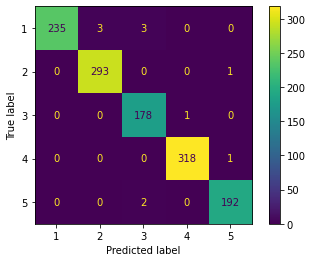

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_prediction)

## Decision Tree

In [ ]:
X = DataFrame.drop('Class', axis=1)

In [ ]:
y = DataFrame['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=6)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
dt_prediction = dt.predict(X_test)

### Model Performance


In [ ]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86       241
           2       0.99      0.94      0.96       294
           3       0.60      0.54      0.57       179
           4       0.98      0.91      0.94       319
           5       0.68      0.89      0.77       194

    accuracy                           0.85      1227
   macro avg       0.82      0.83      0.82      1227
weighted avg       0.86      0.85      0.85      1227



<Figure size 600x400 with 0 Axes>

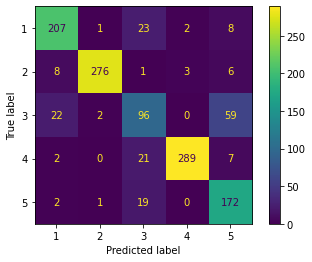

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_prediction)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_prediction = rf.predict(X_test)

### Model Performance

In [ ]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       241
           2       1.00      0.99      0.99       294
           3       0.99      1.00      1.00       179
           4       1.00      1.00      1.00       319
           5       1.00      0.99      1.00       194

    accuracy                           1.00      1227
   macro avg       1.00      1.00      1.00      1227
weighted avg       1.00      1.00      1.00      1227



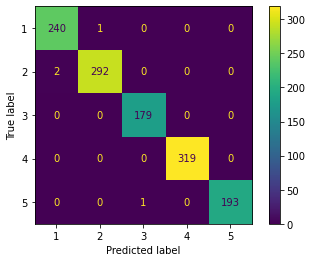

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_prediction)

# Boosted Trees

## Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model = AdaBoostClassifier()

In [ ]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
ada_prediction = ada_model.predict(X_test)

### Model Performance

In [ ]:
print(classification_report(y_test, ada_prediction))

              precision    recall  f1-score   support

           1       0.65      0.79      0.72       241
           2       1.00      0.81      0.89       294
           3       0.58      0.64      0.61       179
           4       0.90      0.79      0.84       319
           5       0.70      0.79      0.74       194

    accuracy                           0.77      1227
   macro avg       0.77      0.76      0.76      1227
weighted avg       0.80      0.77      0.78      1227



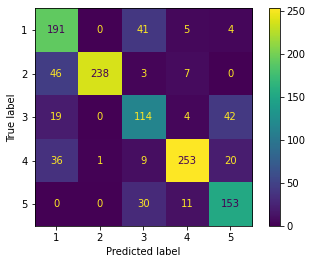

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, ada_prediction)

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_model = GradientBoostingClassifier()

In [ ]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
grad_prediction = grad_model.predict(X_test)

### Model Performance

In [ ]:
print(classification_report(y_test, grad_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       294
           3       0.99      1.00      1.00       179
           4       1.00      1.00      1.00       319
           5       1.00      0.99      1.00       194

    accuracy                           1.00      1227
   macro avg       1.00      1.00      1.00      1227
weighted avg       1.00      1.00      1.00      1227



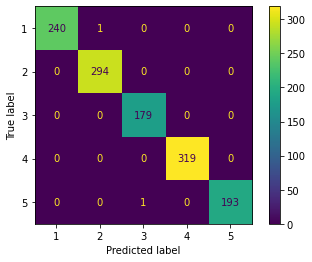

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, grad_prediction)

# Creating a Final Model

In [ ]:
# Best Model - Gradient Boosting Classifier

In [ ]:
# Full Training

In [ ]:
final_model = GradientBoostingClassifier()

In [ ]:
final_model.fit(X,y)

GradientBoostingClassifier()

# Saving the model as a pickle file

In [ ]:
# JOBLIB

In [ ]:
import joblib

In [ ]:
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [ ]:
joblib.dump(list(X.columns), 'column_names.pkl')

['column_names.pkl']

# Loading the Model

In [ ]:
# load model

In [ ]:
loaded_model = joblib.load('final_model.pkl')

In [ ]:
col_names = joblib.load('column_names.pkl')

# Results

In [ ]:
DataFrame.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V120,V121,V122,V123,V124,V125,V126,V127,V128,Class
0,12285.6582,4.076635,4.842317,7.509393,10.822436,-1.312657,-1.853717,-6.924985,11800.9233,4.483500,...,-3.440387,1784.5324,1.907000,1.729200,4.881194,8.623828,-0.314110,-0.661556,-3.521663,3
2,63927.2217,14.956941,19.971376,29.188512,33.291320,-10.433776,-16.062245,-49.490143,57405.8483,15.613843,...,-25.150090,14585.7879,8.189021,6.099452,12.127991,15.709651,-3.887082,-6.731473,-19.326895,3
4,57524.7812,11.912566,14.631496,19.809240,23.715868,-9.084750,-11.770585,-39.234003,50051.0703,11.732548,...,-10.248794,10580.1006,5.752675,3.880740,8.545897,11.831716,-2.655521,-4.312744,-8.510591,3
6,30529.5386,5.966777,7.500612,10.488028,14.834027,-4.763318,-6.363263,-16.922709,26663.9966,6.096648,...,-5.535606,4883.5491,2.716239,2.324221,6.069348,10.196280,-1.189983,-1.970012,-4.981643,3
8,45595.9986,7.756975,11.394358,15.422559,19.436047,-7.277227,-9.474040,-29.713690,38629.1192,7.888008,...,-9.201080,7847.8254,3.231610,3.529234,8.635498,12.566779,-2.055179,-3.354946,-8.126358,3


In [ ]:
# 1: Ethanol
# 2: Ethylene
# 3: Acetaldehyde
# 4: Acetone
# 5: Toluene

In [ ]:
test_df = DataFrame

In [ ]:
test_df["Class"] = test_df["Class"].replace([1, 2, 3, 4, 5], ["Ethanol", "Ethylene", "Acetaldehyde", "Acetone", "Toluene"])

In [ ]:
test_df["Class"].unique()

array(['Acetaldehyde', 'Toluene', 'Ethylene', 'Ethanol', 'Acetone'],
      dtype=object)

# Test for various Gases' data

In [ ]:
def test_gas(loaded_model, data):

    result = loaded_model.predict(data)
    if result[0] == 1:
        return "Ethanol"
    elif result[0] == 2:
        return "Ethylene"
    elif result[0] == 3:
        return "Acetaldehyde"
    elif result[0] == 4:
        return "Acetone"
    elif result[0] == 5:
        return "Toluene"
    else:
        return "Undesired Result"

#### For Ethanol

In [ ]:
ethanol_data = test_df[test_df["Class"] == "Ethanol"].head(1).drop('Class', axis=1)

In [ ]:
result = test_gas(loaded_model, ethanol_data)

In [ ]:
print("Result: ", result)

Result:  Ethanol


#### For Ethylene

In [ ]:
ethylene_data = test_df[test_df["Class"] == "Ethylene"].head(1).drop('Class', axis=1)

In [ ]:
result = test_gas(loaded_model, ethylene_data)

In [ ]:
print("Result: ", result)

Result:  Ethylene


#### For Acetaldehyde

In [ ]:
acetaldehyde_data = test_df[test_df["Class"] == "Acetaldehyde"].head(1).drop('Class', axis=1)

In [ ]:
result = test_gas(loaded_model, acetaldehyde_data)

In [ ]:
print("Result: ", result)

Result:  Acetaldehyde


#### For Acetone

In [ ]:
acetone_data = test_df[test_df["Class"] == "Acetone"].head(1).drop('Class', axis=1)

In [ ]:
result = test_gas(loaded_model, acetone_data)

In [ ]:
print("Result: ", result)

Result:  Acetone


#### For Toluene

In [ ]:
toluene_data = test_df[test_df["Class"] == "Toluene"].head(1).drop('Class', axis=1)

In [ ]:
result = test_gas(loaded_model, toluene_data)

In [ ]:
print("Result: ", result)

Result:  Toluene
